# A single neuron in keras / Pytorch

Polytech SI4

Diane Lingrand Diane.Lingrand@univ-cotedazur.fr

2024-2025

In [3]:
import numpy as np
import torch
from torch import nn
torch.__version__
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.metrics import f1_score, accuracy_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import pandas
from pandas import DataFrame

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation 
from keras.callbacks import EarlyStopping
keras.__version__

'3.5.0'

In [6]:
# test cuda if you have a GPU (not necessary for this lab)
torch.cuda.is_available()

False

# Solving a simple linear regression problem

## Synthetic dataset

For this purpose, we build a synthetic dataset, with some noise.

In [10]:
n = 200 # number of samples
X = torch.rand(n)
noise = (torch.rand(n)-0.5)/50
y = X/4 + 0.2 + noise # note that the true answer to the regression problem is here!

In [11]:
#checking the shapes:
print(X.shape, y.shape)

torch.Size([200]) torch.Size([200])


Let's plot the dataset in order to visualize the amount of noise with the linear problem:

Text(0, 0.5, 'value')

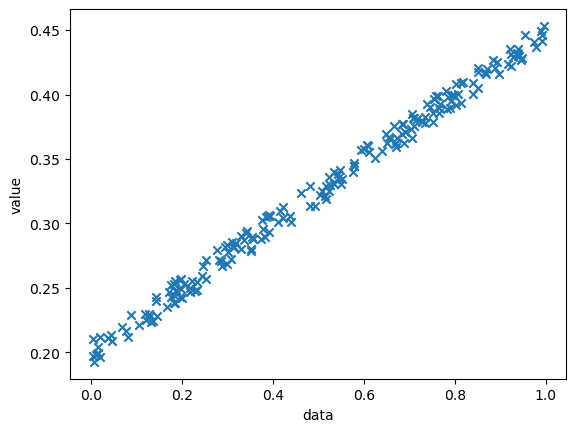

In [13]:
plt.scatter(X,y, marker='x')
plt.xlabel('data')
plt.ylabel('value')

Splitting into train (80%) and test (20%) sets:

In [15]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train),len(X_test))

160 40


For this visualisation, we have used different colors and shapes for train and test. Feel free to change the colors and the shapes.

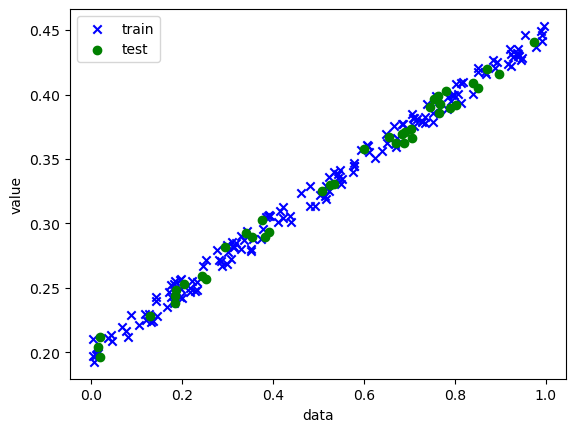

In [21]:
plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.xlabel('data')
plt.ylabel('value')
plt.legend()

##  Using Keras 3 on top of Pytorch

We build here a model composed by a single linear neuron without any activation. The loss function is _mean square error_ **(mse)** and the method for learning is **g**radient **d**escent:

In [27]:
model = Sequential()
model.add(keras.Input(shape=(1,)))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse')

Let's verify the model and the number of parameters:

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We start the training using 10 epochs and computing the loss function on the whole train set. In you re-run the next cell, 10 new epochs will be added from the previous state of the learned neuron.

In [33]:
%%time
history = model.fit(X_train, y_train, epochs=10, batch_size = len(y_train), validation_data=(X_test, y_test ))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 0.0396 - val_loss: 0.0402
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0389 - val_loss: 0.0393
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0381 - val_loss: 0.0385
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0375 - val_loss: 0.0378
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0368 - val_loss: 0.0371
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0356 - val_loss: 0.0357
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0350 - val_loss: 0.0351
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0344 - val_loss: 0.0344
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0339 - val_loss: 0.0339
CPU times: total: 375 ms
Wall time: 851 ms


The variable *history* enables to save a trace of the learning for further display

dict_keys(['loss', 'val_loss'])


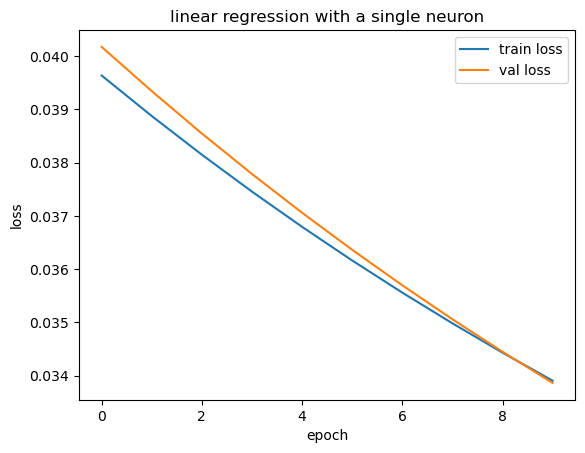

In [35]:
print(history.history.keys())
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('linear regression with a single neuron')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


Let's display the train set, the test set, the prediction of the train and the test set and the true answer.

In [37]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


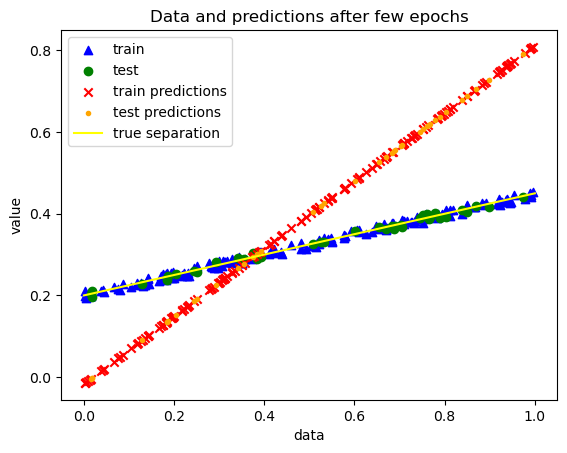

In [38]:
plt.scatter(X_train, y_train, marker='^', color='blue',label='train')
plt.scatter(X_test, y_test, marker='o', color='green', label='test')

plt.scatter(X_train, ypred_train, marker='x', color='red', label='train predictions')
plt.scatter(X_test, ypred_test, marker='.', color='orange', label='test predictions')

data = np.linspace(0,1,100)
plt.plot(data,0.25*data+0.2, color='yellow', label='true separation')

plt.xlabel('data')
plt.ylabel('value')
plt.title('Data and predictions after few epochs')
plt.legend()

In [39]:
model.get_weights()

[array([[0.82967395]], dtype=float32), array([-0.01701251], dtype=float32)]

## Training improvements

There is space for improvements:
 - stopping criterion (not only the number of epochs)
 - batch size
 - optimizer

### Early stopping

Early stopping is a callback that will stop the training if *monitor*, the variable that is monitored, does not improve of at least *min_delta* during *patience* epochs. The fit method is called using a large number of epochs. Since we monitor the loss function on the validation set, we need to define how to split the train set into train and validation using a *validation_split* ratio for the validation set.

In [49]:
from keras.callbacks import EarlyStopping
ourCallback = EarlyStopping(monitor='val_loss', min_delta=0.000001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [64]:
%%time
history = model.fit(X_train, y_train, epochs=500, batch_size = 160, validation_split=0.2, callbacks=[ourCallback])

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 5.0701e-05 - val_loss: 5.5469e-05
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.0659e-05 - val_loss: 5.5420e-05
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.0617e-05 - val_loss: 5.5372e-05
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.0575e-05 - val_loss: 5.5324e-05
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.0533e-05 - val_loss: 5.5276e-05
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 5.0491e-05 - val_loss: 5.5228e-05
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.0449e-05 - val_loss: 5.5180e-05
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.0408e-05 - val_loss: 5.5132e-05
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.0366e-05 - val_loss: 5.5085e-05
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.0325e-05 - val_loss: 5.5037e-05
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.0284e-05 - val_lo

In [66]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


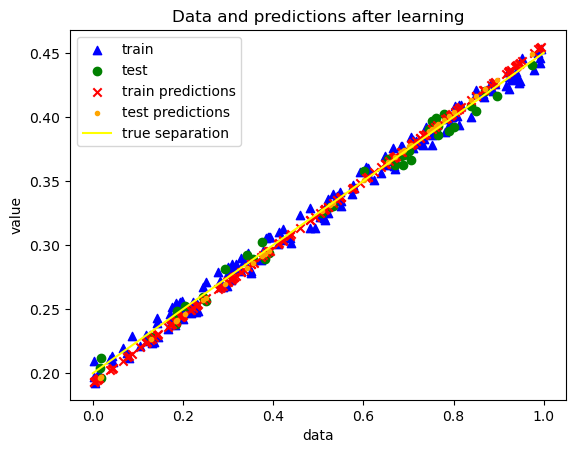

In [68]:
plt.scatter(X_train, y_train, marker='^', color='blue',label='train')
plt.scatter(X_test, y_test, marker='o', color='green', label='test')

plt.scatter(X_train, ypred_train, marker='x', color='red', label='train predictions')
plt.scatter(X_test, ypred_test, marker='.', color='orange', label='test predictions')

data = np.linspace(0,1,100)
plt.plot(data,0.25*data+0.2, color='yellow', label='true separation')

plt.xlabel('data')
plt.ylabel('value')
plt.title('Data and predictions after learning')
plt.legend()

<font color="green"><b>Question:</b></font> Using the model's parameters, can you plot the predicted line?

In [71]:
model.get_weights()
# your work

[array([[0.26347312]], dtype=float32), array([0.19243431], dtype=float32)]

<font color="green"><b>Question:</b></font> Experiment the influence of the early stopping parameters for the regression convergence.

In [ ]:
# your work

### Batch size

<font color="green"><b>Question:</b></font> Try different batch sizes. What is the influence of the batch size on:
- computation time
- number of iterations / epochs
- performances

In [ ]:
# your work

<font color="green"><b>Question:</b></font> Display the results of data and predictions after your best learning experience.

In [ ]:
# your work

### Optimizer

<font color="green"><b>Question:</b></font> SGD in keras is the simple gradient descent. Examine the <a href='https://keras.io/api/optimizers/sgd/'>API</a> and test potentially interesting parameters.

In [ ]:
# your work

## The same single neuron but using only Pytorch (for advanced students)

### Single neuron as a model

We have 2 solutions for implementing a single neuron: 

The first solution is to implement the linear transformation:

In [ ]:
class SingleNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x+self.bias

The second solution is to use the <a href="https://pytorch.org/docs/stable/generated/torch.nn.Linear.html">nn.Linear</a> class:

In [ ]:
class SingleNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

Let's build one model using a single neuron:

In [ ]:
myModel = SingleNeuron()

We have access to the model's parameters:

In [ ]:
for p in myModel.parameters():
    print(p)

Let's compute the predictions of the model before learning:

In [ ]:
with torch.no_grad(): # or inference_mode(): 
    ypred = myModel(X_test)

In [ ]:
plt.scatter(X_train,y_train, marker='x', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')
plt.scatter(X_test,ypred, marker='.', color='orange', label='test predictions')

plt.xlabel('data')
plt.ylabel('value')
plt.title('Data and predictions before learning')
plt.legend()

In [ ]:
loss_fn = nn.MSELoss()
error = loss_fn(y_test, ypred)
print('mse error = ', error)

In [ ]:
print(ypred.shape, y_test.shape)

In [ ]:
epochs = 4000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

lr = 0.002
optimizer = torch.optim.SGD(myModel.parameters(), lr)

In [ ]:
# training loop

for epoch in range(epochs):
    myModel.train() # sets all params that req grad to req grad
    
    # forward pass
    y_pred = myModel(X_train)
    # loss computation
    loss = loss_fn(y_pred,y_train)
    # no gradient accumulation
    optimizer.zero_grad()
    # backprop
    loss.backward()
    # gradient descent step using optimizer
    optimizer.step() # how optim accumulates
   
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = myModel(X_test)
    
       # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test)
       # Print out what's happening

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MSE Train Loss: {loss} | MSE Test Loss: {test_loss} ")

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.no_grad(): # or inference_mode(): 
    ypred_train = myModel(X_train)
    ypred_test = myModel(X_test)

In [ ]:
error = loss_fn(y_test, ypred_test)
print('mse error = ', error)
print(torch.sum(torch.abs(y_test-ypred_test))/n)

In [ ]:
plt.scatter(X_train,y_train, marker='^', color='blue',label='train')
plt.scatter(X_test,y_test, marker='o', color='green', label='test')

plt.scatter(X_train,ypred_train, marker='x', color='red', label='train predictions')
plt.scatter(X_test,ypred_test, marker='.', color='orange', label='test predictions')

data = np.linspace(0,1,100)
plt.plot(data,0.25*data+0.2, color='yellow', label='truth')

plt.xlabel('data')
plt.ylabel('value')
plt.title('Data and predictions before learning')
plt.legend()

In [ ]:
for p in myModel.parameters():
    print(p)

In [ ]:
print(ypred_train.shape)

# Solving a simple binary linear classification problem

## Synthetic dataset

In [ ]:
n = 200 # number of samples
X = torch.rand(n,2)
noise = (torch.rand(n)-0.5)/50
ySep = X[:,1]-X[:,0]*0.6 - 0.2 + noise # note that the true answer to the regression problem is here!
y = np.array([0 if lab < 0 else 1 for lab in ySep])

In [ ]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train),len(X_test))

In [ ]:
color = ['blue', 'green']
train_colors = [ color[y] for y in y_train]
test_colors = [ color[y] for y in y_test]
plt.scatter(X_train[:,0],X_train[:,1], marker='x', color=train_colors,label='train')
plt.scatter(X_test[:,0],X_test[:,1], marker='o', color=test_colors, label='test')
plt.plot([0,1],[0.2,0.8], color='yellow', linewidth=4, label='true')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
trainPos =  mlines.Line2D([], [], color='green', linestyle='', marker='x',label='train pos.')
trainNeg = mlines.Line2D([], [], color='blue', linestyle='', marker='x',label='train neg.')
testPos = mlines.Line2D([], [], color='green', linestyle='', marker='o',label='test pos.')
testNeg = mlines.Line2D([], [], color='blue', linestyle='', marker='o',label='test neg.')
trueSep = mlines.Line2D([], [], color='yellow', linewidth=4, marker='',label='true sep.')
plt.legend(handles=[trainPos,trainNeg,testPos,testNeg,trueSep])
plt.savefig('binaryLinearClassDataset.pdf')

## Simple model

We build here a model composed by a single linear neuron with a sigmoid activation. The loss function is the binary cross-entropy (as for the logistic regression) and the method for learning is gradient descent. We add the accuracy metric: it is another metric that will be tracked along the epochs together with the loss function.

In [ ]:
model = Sequential()
model.add(keras.Input(shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

<font color="green"><b>Question:</b></font> Try to learn this model over few epochs

In [ ]:
# your work

<font color="green"><b>Question:</b></font> Add a callback for early stopping. You can monitor the loss (or val_loss) or the accuracy (or val_accuracy). Try also different mini-batch sizes. Play with these parameters until you are satisfied with the results. For each experiment, you will have to plot the history and displayPlay with these parameters. Play with these parameters. Play with these parameters.  the classification metrics.

In [ ]:
# your work

<font color="green"><b>Question:</b></font> Another way to visualize the results is to plot the prediction. In this example, we use the shape to differentiate the train and test and the colors to differentiate the positive or negative prediction. Feel free to change these parameters. We have also plotted the true separation in yellow and we ask you to fill better the code for the orange line that is the predicted separation.

In [ ]:
# your work: change these a and b values for the orange line
a = 1
b = 1
color = ['blue', 'green']
train_colors = [ color[y] for y in ypred_train]
test_colors = [ color[y] for y in ypred_test]
plt.scatter(X_train[:,0],X_train[:,1], marker='x', color=train_colors, label='train')
plt.scatter(X_test[:,0],X_test[:,1], marker='o', color=test_colors, label='test')
plt.plot([0,1],[0.2,0.8], color='yellow', linewidth=4, label='true separation')
plt.plot([0,1],[a,b], color='orange', linewidth=4, label='predicted separation')

plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
trainPos =  mlines.Line2D([], [], color='green', linestyle='', marker='x',label='train predict pos.')
trainNeg = mlines.Line2D([], [], color='blue', linestyle='', marker='x',label='train predict neg.')
testPos = mlines.Line2D([], [], color='green', linestyle='', marker='o',label='test predict pos.')
testNeg = mlines.Line2D([], [], color='blue', linestyle='', marker='o',label='test predict neg.')
trueSep = mlines.Line2D([], [], color='yellow', linewidth=4, marker='',label='true sep.')
predSep = mlines.Line2D([], [], color='orange', linewidth=4, marker='',label='predict. sep.')

plt.legend(handles=[trainPos,trainNeg,testPos,testNeg,trueSep, predSep])